# Shopify 2022 Data Science Intern Challange #

## Mohammad Abbasi Eskandari ##

### Importing required libraries ###

In [86]:
%matplotlib notebook

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv ('data.csv')

In [115]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,DayofMonth,DayofWeek
0,1,53,746,224,2,cash,2017-03-13 12:36:00,13,Monday
1,2,92,925,90,1,cash,2017-03-03 17:38:00,3,Friday
2,3,44,861,144,1,cash,2017-03-14 04:23:00,14,Tuesday
3,4,18,935,156,1,credit_card,2017-03-26 12:43:00,26,Sunday
4,5,18,883,156,1,credit_card,2017-03-01 04:35:00,1,Wednesday


The given AOV was naively calculated by averaging the total order_amount over the number of order_amount. It leads to a wrong AOV.

In [116]:
df['order_amount'].mean()

3145.128

The right way to calculate the average price is the division of total order_amount by sum of total_items.

In [91]:
print ("The average price per sneaker is" ,"%.2f" % (df['order_amount'].sum()/df['total_items'].sum()),"$")

The average price per sneaker is 357.92 $


This method gives the AOV of **\$357.92** which is still pretty high for a relatively affordable item, such as sneakers. In order to get more information, we should take a look at the average price per each store, individually.

In [92]:
df_per_store = df.groupby('shop_id', as_index=False).sum()

In [93]:
df_per_store ['ave_price'] = df_per_store['order_amount']/df_per_store['total_items']

In [94]:
df_per_store.sort_values('ave_price', ascending=False)

,shop_id,order_id,user_id,order_amount,total_items,ave_price
77,78,122499,39916,2263800,88,25725.0
41,42,124538,38688,11990176,34063,352.0
11,12,135437,44755,18693,93,201.0
88,89,172859,50618,23128,118,196.0
98,99,128844,45693,18330,94,195.0
...,...,...,...,...,...,...
52,53,162752,58381,14560,130,112.0
99,100,94261,34093,8547,77,111.0
31,32,96561,35986,7979,79,101.0
1,2,126448,47370,9588,102,94.0


As is evident, the average price at store **#78** is **\$25725** per item, which is way too expensive. It looks like it is a luxury store.

So, in order to have a better comparison between the stores and get a more realistic average price, it is better to drop store #78 for the rest of our calcultions.

Also, store **#42** has sold **34063** items, which is way more than the other stores. It seems this is a wholesale store. So, in order not to disrupt our analysis, we should drop this store too. 

In [95]:
df_per_store = df_per_store.drop(df_per_store[df_per_store['shop_id'] == 78].index |
                                 df_per_store[df_per_store['shop_id'] == 42].index)

<ipython-input-95-439e97836d24>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df_per_store = df_per_store.drop(df_per_store[df_per_store['shop_id'] == 78].index |


In [96]:
Average_price = df_per_store['order_amount'].sum()/df_per_store['total_items'].sum()

In [97]:
Average_price

150.4

Now, the average price per item is **\$150.4** which totally makes sense. This is a realistic average value for sneakers.

As it is shown, the correct way to calculate the average would be to the total of all order_values by the sum of total_items. This method gave us the AOV of **\$357.92** per item which is more realistic than the given value **\$3145.13**. Moreover, by doing some further analysis we realised that there is a luxury store with the AOV of **\$25725** per item, by dropping this luxury store and a wholesale store, we reached a AOV of **\$150.4** per item.

## Exploratory data analysis

We can use "created_at" column to find out how many items were sold per day.

First, need to convert the column into datetime format. Then we can extract the day of the month and the day of the week from it.

In [98]:
df['created_at']=pd.to_datetime(df['created_at'])

In [99]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:00
1,2,92,925,90,1,cash,2017-03-03 17:38:00
2,3,44,861,144,1,cash,2017-03-14 04:23:00
3,4,18,935,156,1,credit_card,2017-03-26 12:43:00
4,5,18,883,156,1,credit_card,2017-03-01 04:35:00


In [100]:
df['DayofMonth'] = df['created_at'].dt.day

In [101]:
df['DayofWeek'] = df['created_at'].dt.day_name()

In [102]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,DayofMonth,DayofWeek
0,1,53,746,224,2,cash,2017-03-13 12:36:00,13,Monday
1,2,92,925,90,1,cash,2017-03-03 17:38:00,3,Friday
2,3,44,861,144,1,cash,2017-03-14 04:23:00,14,Tuesday
3,4,18,935,156,1,credit_card,2017-03-26 12:43:00,26,Sunday
4,5,18,883,156,1,credit_card,2017-03-01 04:35:00,1,Wednesday


By removing the wholesale store, total items per day can be illustrated. 

<IPython.core.display.Javascript object>


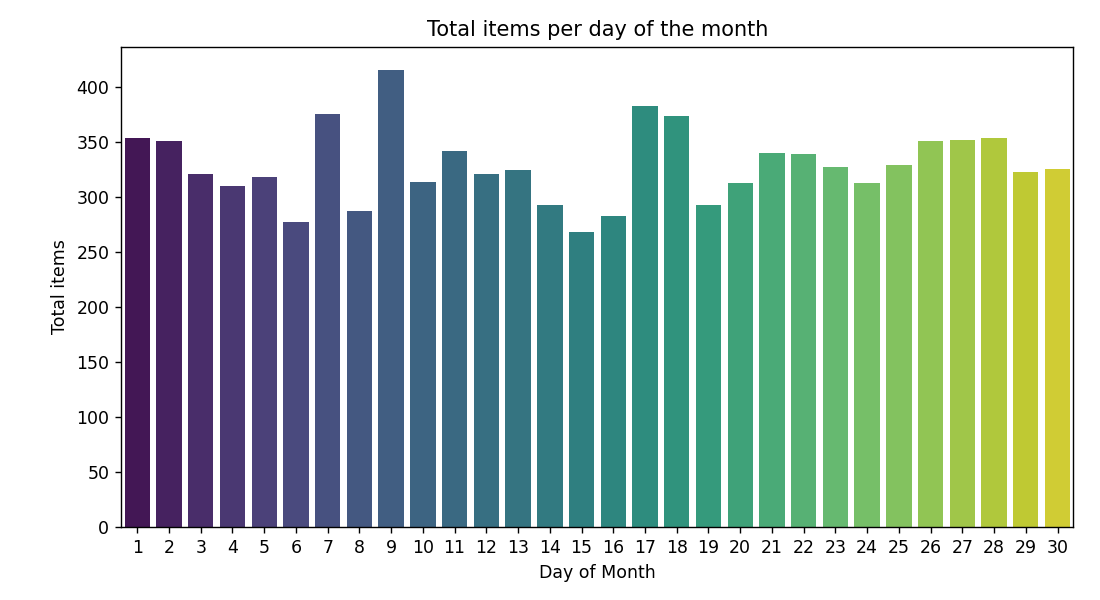

In [113]:
sns.barplot (x='DayofMonth', y='total_items',
             data=df.drop(df[df['shop_id']==42].index).groupby('DayofMonth',as_index=False).sum(), palette='viridis')
plt.title("Total items per day of the month")
plt.xlabel('Day of Month')
plt.ylabel ('Total items')
plt.tight_layout()

<IPython.core.display.Javascript object>


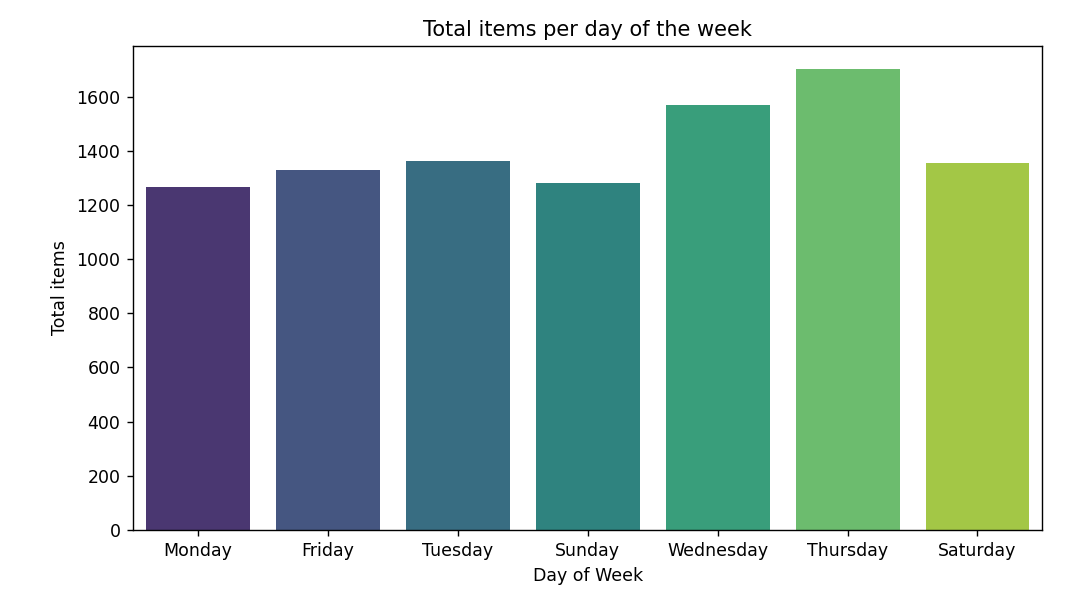

In [112]:
sns.barplot (x='DayofWeek', y='total_items',
             data=df.drop(df[df['shop_id']==42].index).groupby('DayofWeek',sort=False,as_index=False).sum(), palette='viridis')
plt.title("Total items per day of the week")
plt.xlabel('Day of Week')
plt.ylabel('Total items')
plt.tight_layout()

As it is shown in the monthly chart, the number of items sold per day is almost in the same range over the month, and the highest number of items sold was on Thursdays.